In [1]:
import pandas as pd

GIT = 'https://github.com/tyokokur/tmpdat/raw/main/nfh/'
dat = pd.read_csv(GIT+'NFH_train.txt', sep='\s+', names=['parent','chiname','b','v',
                                                         'cs','gH','tH0','tH1','tH2','tH3'])
chimax = [float(i.split('.')[2][2:]) / 100 for i in dat.chiname.values]
to_train = dat.iloc[:,2:].join(pd.Series(chimax, name='chimax'))
to_train = to_train[['b','v','chimax','cs','gH','tH0','tH1','tH2','tH3']]
display(to_train)

,b,v,chimax,cs,gH,tH0,tH1,tH2,tH3
0,2.2,1.20,3.10,0.004,37.76,89.82,84.25,77.82,69.56
1,2.2,1.20,3.10,0.005,27.73,80.27,74.45,67.77,59.27
2,2.2,1.20,3.10,0.006,22.46,71.73,65.75,58.97,50.65
3,2.2,1.20,3.10,0.008,18.72,62.46,56.79,50.55,43.16
4,2.2,1.20,3.10,0.010,16.57,57.21,51.86,45.95,38.91
...,...,...,...,...,...,...,...,...,...
585,2.5,1.25,3.15,0.015,14.60,52.64,46.77,40.23,32.48
586,2.5,1.25,3.15,0.020,12.81,46.76,40.83,34.17,26.35
587,2.5,1.25,3.15,0.030,11.55,39.16,33.16,26.67,19.67
588,2.5,1.25,3.15,0.040,11.03,34.76,29.04,23.13,17.11


In [2]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# Define the neural network architecture
class CurveFitter(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(4, 10)
        self.fc2 = torch.nn.Linear(10, 10)
        self.fc3 = torch.nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Define the function to train the model
def train_model(model, train_input, train_target, num_epochs, optimizer, loss_fn):
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        output = model(train_input)
        loss = loss_fn(output, train_target)
        loss.backward()
        optimizer.step()
        if epoch % 10000 == 0:
            print(f"Epoch {epoch}, loss {loss.item()}")


# Generate training data
train_input  = torch.tensor(to_train.iloc[:,:4].values, dtype=torch.float32)
train_target = torch.tensor(to_train.tH0.values,  dtype=torch.float32).unsqueeze(1)

# Define the model, loss function, and optimizer
model = CurveFitter()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
train_model(model, train_input, train_target, int(1e5), optimizer, loss_fn)

# Generate test input values
b_test = torch.linspace(0.5, 3.0, 50)
v_test = torch.linspace(0.1, 10, 50)
ch_test = torch.linspace(3.0, 4.0, 50)
cs_test = torch.logspace(-3, 2, 50)
B, V, CH, CS = torch.meshgrid(b_test, v_test, ch_test, cs_test)

# Compute curve predictions for test input values
test_input = torch.stack([B.flatten(), V.flatten(), CH.flatten(), CS.flatten()], axis=1)
curve_predictions = model(test_input).detach().numpy().reshape(B.shape)

Epoch 0, loss 3807.850341796875
Epoch 10000, loss 11.975839614868164
Epoch 20000, loss 11.353887557983398
Epoch 30000, loss 10.48802661895752
Epoch 40000, loss 10.033254623413086
Epoch 50000, loss 10.126399993896484
Epoch 60000, loss 10.652588844299316
Epoch 70000, loss 10.108100891113281
Epoch 80000, loss 10.650701522827148
Epoch 90000, loss 10.87600040435791


C:\Users\takas\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


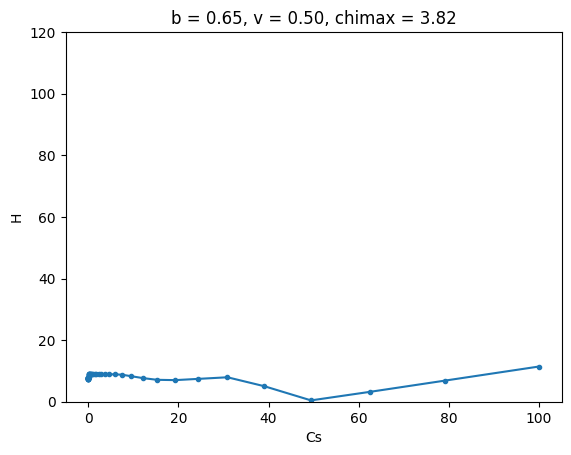

In [14]:
bind, vind, chind = 3, 2, 40
plt.subplots(1,1)
plt.plot(cs_test[:], curve_predictions[bind, vind, chind, :], '.-')
plt.title('b = {:.2f}, v = {:.2f}, chimax = {:.2f}'.format(b_test[bind].numpy(), v_test[vind].numpy(), ch_test[chind].numpy()))
plt.xlabel('Cs')
plt.ylabel('H')
plt.ylim(0, 120)
plt.show()

In [ ]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

## Globals ##
n_in  = 2
n_out = 1


# Define the target function
def target_function(x, y):
    return x**2 - y**3


# Define the neural network architecture
class CurveFitter(torch.nn.Module):
    global n_in
    global n_out 
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(n_in, 64)
        self.fc2 = torch.nn.Linear(64, 64)
        self.fc3 = torch.nn.Linear(64, n_out)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Define the function to train the model
def train_model(model, train_input, train_target, num_epochs, optimizer, loss_fn):
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        output = model(train_input)
        loss = loss_fn(output, train_target)
        loss.backward()
        optimizer.step()
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, loss {loss.item()}")


# Generate training data
train_input = torch.empty(1000, n_in).uniform_(0, 1)
train_target = target_function(train_input[:, 0], train_input[:, 1]).unsqueeze(1)

# Define the model, loss function, and optimizer
model = CurveFitter()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
train_model(model, train_input, train_target, 10000, optimizer, loss_fn)

# Generate test input values
x_test = torch.linspace(0, 1, 100)
y_test = torch.linspace(0, 1, 100)
X, Y = torch.meshgrid(x_test, y_test)

# Compute curve predictions for test input values
test_input = torch.stack([X.flatten(), Y.flatten()], axis=1)
curve_predictions = model(test_input).detach().numpy().reshape(X.shape)

# Plot the true curve and predicted curve
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
ax.contourf(X, Y, target_function(X, Y), levels=20, cmap='viridis')
ax.set_title('True Curve')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Plot the predicted curve
ax = fig.add_subplot(122)
ax.contourf(X, Y, curve_predictions, levels=20, cmap='viridis')
ax.set_title('Predicted Curve')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Show the plot
plt.show()

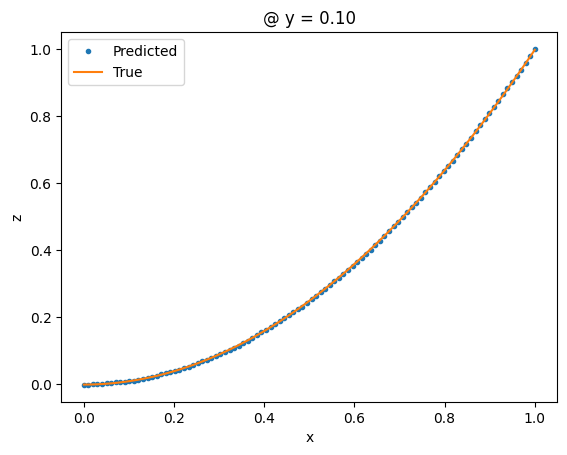

In [2]:
f, ax = plt.subplots(1,1)
yind = 10
ax.plot(X[:,yind], curve_predictions[:,yind], 'o', ms=3, label='Predicted')
ax.plot(X[:,yind], target_function(X[:,yind], Y[:,yind]), label='True')
ax.set_title('@ y = {:.2f}'.format(Y[0, yind].numpy()))
ax.set_ylabel('z')
ax.set_xlabel('x')

plt.legend()
plt.show()

In [139]:
to_train.tH0.values

array([ 89.82,  80.27,  71.73,  62.46,  57.21,  49.81,  44.78,  37.32,
        32.71,  29.95,  90.49,  85.11,  75.69,  64.86,  58.85,  50.94,
        45.95,  38.58,  33.83,  30.9 ,  88.59,  76.2 ,  69.49,  61.27,
        56.48,  49.41,  44.42,  37.01,  32.49,  29.8 ,  87.49,  75.26,
        68.86,  60.93,  56.28,  49.28,  44.3 ,  36.92,  32.42,  29.76,
        90.52,  85.99,  81.4 ,  68.94,  60.98,  51.18,  45.38,  37.87,
        33.64,  31.15,  89.62,  84.13,  75.06,  63.16,  57.  ,  48.39,
        42.63,  35.39,  31.59,  29.42,  90.11,  85.27,  79.24,  65.9 ,
        58.86,  49.77,  44.01,  36.61,  32.58,  30.26,  89.39,  83.38,
        73.31,  62.18,  56.31,  47.84,  42.07,  34.91,  31.2 ,  29.1 ,
        88.99,  81.25,  70.91,  60.8 ,  55.34,  47.01,  41.24,  34.21,
        30.65,  28.64,  88.67,  78.84,  69.44,  59.96,  54.72,  46.45,
        40.69,  33.76,  30.29,  28.35,  88.77,  78.82,  69.09,  59.6 ,
        54.39,  46.07,  40.29,  33.42,  30.03,  28.13,  92.88,  88.84,
      